# Algoritmo de Grover

Suponha que temos um espaço amostral com
$$N=2^{n} \text{ amostras},$$
com $n\in\mathbb{N}_{+}$. Focaremos nos índices das amostras, mais que nos seus valores. Com isso, vemos que os valores do índice podem ser armazenados usando $n$ qubits. Com isso, o algoritmo pode ser aplicado para vários tipos de amostras, como localizar um número de telofone em uma lista telefônica ou um número de CPF em um banco de dados e.g. do receita federal.

O __problema__ que queremos resolver é encontrar $1\le M \le N$ soluções, que são amostras que possuem uma determinada propriedade. Por definição, para
$$x = 0,\cdots, 2^{n}-1$$
temos que
\begin{cases}
f(x) = 1 \text{ se } x \text{ é solução}, \\
f(x) = 0 \text{ se } x \text{ não é solução}.
\end{cases}

Vamos supor que nos é dado uma _caixa preta quântica_ (um oráculo), que consegue reconhecer soluções e que é representado pela matriz unitária $U_{f}$ cuja ação na base computacional é
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle,$$
em que $x$ é o índice do registro quântico utilizado para representar os dados (um dos $2^n$ estados da base computacional de $n$ qubits), $|y\rangle$ é o estado inicial do qubit auxiliar e $\oplus$ é a soma módulo 2. Por exemplo, podemos verificar se $x$ é solução preparando $|x\rangle|0\rangle$ e verificando se o qubit auxiliar é invertido para $|1\rangle$.

Nosso objetivo aqui é encontrar o item (os itens) procurados utilizando o menor número possível de chamadas da caixa preta quântica.

Assim como no algoritmo de Deutsch-Jozsa, no algoritmo de Grover inicializamos o qubit auxiliar no estado $|-\rangle$. Teremos assim que
\begin{align}
& U_{f}|x\rangle|-\rangle = \frac{1}{\sqrt{2}}\Big(U_{f}|x\rangle|0\rangle - U_{f}|x\rangle|1\rangle\Big) \\
& = \frac{1}{\sqrt{2}}\Big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\Big) \\
& = \frac{1}{\sqrt{2}}\Big(|x\rangle|f(x)\rangle - |x\rangle|\overline{f(x)}\rangle\Big) \\
& = |x\rangle(-1)^{f(x)}\frac{1}{\sqrt{2}}\Big(|0\rangle - |1\rangle\Big) \\
& = (-1)^{f(x)}|x\rangle|-\rangle.
\end{align}

Ou seja, a ação do oráculo, $|x\rangle\rightarrow (-1)^{f(x)}|x\rangle$, é marcar as soluções com uma fase $e^{i\pi}=-1$:
\begin{align}
& U_{f(x)=0}|x\rangle|-\rangle = |x\rangle|-\rangle, \\
& U_{f(x)=1}|x\rangle|-\rangle = -|x\rangle|-\rangle.
\end{align}

Vamos começar considerando o caso em que buscamos uma __única solução__
$$|x'\rangle.$$

Não é difícil ver que a transformação unitária
\begin{align}
U_{o} & = I-2|x'\rangle\langle x'| \\
& = \sum_{x=0}^{N-1}|x\rangle\langle x|-2|x'\rangle\langle x'| \\
& = \sum_{x\ne x'}|x\rangle\langle x|-|x'\rangle\langle x'|,
\end{align}
que atua somente nos $n$ qubits, não muda estados $|x\rangle$ ortogonais a $|x'\rangle$ e que adiciona uma fase $e^{i\pi}=-1$ ao estado $|x'\rangle$, i.e.,
\begin{align}
& U_0|x'\rangle = -|x'\rangle, \\
& U_0|x'_\perp\rangle = |x'_\perp\rangle.
\end{align}
Ou seja, $U_{o}$ tem o mesmo efeito que $U_{f}$, só que sem usar o qubit auxiliar no estado $|-\rangle$. Vamos denotar isso por
$$U_0\equiv U_f.$$

__Exercício:__ Verifique que o operador $U_{o} = I-2|x'\rangle\langle x'|$ é unitário.

O algoritmo de Grover começa preparando o chamado _estado de Hadamard_
\begin{align}
|h\rangle & = H^{\otimes n}|0\rangle^{\otimes n} \\
& = |+\rangle^{\otimes n} \\
& = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle \\
& = \frac{1}{\sqrt{N}}|x'\rangle + \frac{1}{\sqrt{N}}\sum_{x\ne x'}|x\rangle \\
& = \frac{1}{\sqrt{N}}|x'\rangle + \sqrt{\frac{N-1}{N}}|x'_{\perp}\rangle \\
& =:  \sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle,
\end{align}
em que definimos
\begin{align}
& \sin\theta := \frac{1}{\sqrt{N}}\ \therefore\ \theta = \arcsin\big(1/\sqrt{N}\big), \\
& \cos\theta = \sqrt{\frac{N-1}{N}}\ \therefore\ \theta = \arccos\big(\sqrt{(N-1)/N}\big),
\end{align}
e
$$|x'_{\perp}\rangle := \frac{1}{\sqrt{N-1}}\sum_{x\ne x'}|x\rangle.$$

Seguindo, definimos o estado ortogonal a $|h\rangle$:
$$|h_{\perp}\rangle = \cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle.$$

__Exercício:__ Verificar que
\begin{cases}
|x'\rangle = \sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle, \\
|x'_{\perp}\rangle = \cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle.
\end{cases}

Teremos assim que
\begin{align}
& |g_0\rangle = U_{o}|h\rangle \\
& = \sin\theta\ U_{o}|x'\rangle + \cos\theta\ U_{o}|x'_{\perp}\rangle \\
& = -\sin\theta |x'\rangle + \cos\theta |x'_{\perp}\rangle \\
& = -\sin\theta\big(\sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle\big) + \cos\theta\big(\cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle\big) \\
& = \big(-\sin^{2}\theta+\cos^{2}\theta\big)|h\rangle + \big(-\sin\theta\cos\theta-\sin\theta\cos\theta\big)|h_{\perp}\rangle \\
& = \cos(2\theta)|h\rangle - \sin(2\theta)|h_{\perp}\rangle.
\end{align}
Acima e doravante usamos as indentidades trigonométricas
\begin{align}
& \cos(\alpha\pm\beta) = \cos\alpha\cos\beta \mp \sin\alpha\sin\beta, \\
& \sin(\alpha\pm\beta) = \sin\alpha\cos\beta \pm \cos\alpha\sin\beta.
\end{align}

Se olharmos para o "plano" $\big(|x'\rangle,|x'_{\perp}\rangle\big)$, vemos que a ação de $U_{o}$ (do oráculo) é refletir o vetor $|h\rangle$ em relação ao eixo $|x'_{\perp}\rangle$. Veja a figura abaixo.

![](https://drive.google.com/uc?export=view&id=1WUOOvBVwNTx-NE61SiRQEhH-3x9IQjbx)

Vale observar que a ação de $U_0$ terá esse mesmo efeito, de refletir o estado em relação a $|x'_\perp\rangle$, quando aplicada em qualquer combinação linear $\sin(j\theta)|x'\rangle+\cos(j\theta)|x'_\perp\rangle$, pois leva $|x'\rangle\rightarrow |x'\rangle$  e $|x'_\perp\rangle\rightarrow |x'_\perp\rangle,$ que efetivamente faz $\theta\rightarrow -\theta$.

Seguindo, definimos o seguinte operador unitário, que chamaremos de _inversor de Hadamard_:
$$U_{h} := 2|h\rangle\langle h|-I.$$

__Exercício:__ Verificar que o operador $U_{h}$ é unitário.

Esse operador não modifica o estado $|h\rangle$, i.e.,
$$U_h|h\rangle=|h\rangle,$$
mas dá uma fase $e^{i\pi}=-1$ a todo estado ortogonal a $|h\rangle$, i.e.,
$$U_h|h_\perp\rangle=-|h_\perp\rangle.$$

Vale observar que como qualquer estado pode ser escrito como uma combinação linear de $|h\rangle$ e $|h_\perp\rangle$, quando aplicado em um estado qualquer, a ação de $U_h$ será de refletir o estado em relação a $|h\rangle$.

Vamos considerar a composição dessas duas operações unitárias, i.e.,
$$G = U_{h}U_{o},$$
que é chamada de __iteração de Grover__. Note que a ação de $G$ é primeiro refletir o estado em ralação a $|x'_\perp\rangle$ e depois refletir o estado em relação a $|h\rangle$. Veja a figura acima.

Usando esse operador, podemos escrever
\begin{align}
& |g_1\rangle = G|h\rangle \\
& = U_{h}U_{o}|h\rangle \\
& = \cos(2\theta)\ U_{h}|h\rangle - \sin(2\theta)\ U_{h}|h_{\perp}\rangle \\
& = \cos(2\theta)|h\rangle + \sin(2\theta)|h_{\perp}\rangle \\
&  = \cos(2\theta)\big(\sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle\big) + \sin(2\theta)\big(\cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle\big) \\
&  = \big(\cos(2\theta)\sin\theta + \sin(2\theta)\cos\theta \big)|x'\rangle + \big(\cos(2\theta)\cos\theta - \sin(2\theta)\cos\theta \big)|x'_{\perp}\rangle \\
&  = \sin(3\theta)|x'\rangle + \cos(3\theta)|x'_{\perp}\rangle.
\end{align}

Ou seja, o operador $U_{h}$ reflete o estado em relação a $|h\rangle$, como mostrado na na figura acima.

A iteração de Grover leva o estado inicial $|h\rangle$, que está a um ângulo $\pi/2-\theta$ da solução $|x'\rangle$, em um estado
$$|g_{1}\rangle = G|h\rangle$$
que está mais próximo, a um ângulo $\pi/2-3\theta$, da solução.

Aplicando a iteração de Grover mais uma vez, teremos
\begin{align}
& |g_{2}\rangle = G|g_{1}\rangle = G^2|h\rangle \\
& = U_{h}U_{o}|g_{1}\rangle \\
& = U_{h}\Big(\sin(3\theta)\ U_{o}|x'\rangle + \cos(3\theta)\ U_{o}|x'_{\perp}\rangle\Big) \\
& = U_{h}\Big(-\sin(3\theta)|x'\rangle + \cos(3\theta)|x'_{\perp}\rangle\Big) \\
& = U_{h}\Big(-\sin(3\theta)\big(\sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle\big) + \cos(3\theta)\big(\cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle\big)\Big) \\
& = U_{h}\Big( \big(-\sin(3\theta)\sin\theta + \cos(3\theta)\cos\theta\big)|h\rangle - \big( \sin(3\theta)\cos\theta + \cos(3\theta)\sin\theta \big)|h_{\perp}\rangle\big)  \\
& = \cos(4\theta)\ U_{h}|h\rangle - \sin(4\theta)\ U_{h}|h_{\perp}\rangle \\
& = \cos(4\theta)|h\rangle + \sin(4\theta)|h_{\perp}\rangle \\
& = \cos(4\theta)\big(\sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle\big) + \sin(4\theta)\big(\cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle\big) \\
& = \big(\cos(4\theta)\sin\theta+\sin(4\theta)\cos\theta\big)|x'\rangle + \big(\cos(4\theta)\cos\theta-\sin(4\theta)\sin\theta\big)|x'_{\perp}\rangle \\
& = \sin(5\theta)|x'\rangle + \cos(5\theta)|x'_{\perp}\rangle.
\end{align}

Generalizando, vemos que para a __$j$-ésima iteração de Grover__, teremos
\begin{align}
& |g_{j}\rangle = G^{j}|h\rangle \\
& = \sin((2j+1)\theta)|x'\rangle + \cos((2j+1)\theta)|x'_{\perp}\rangle.
\end{align}

Para que
$$|g_{j}\rangle = |x'\rangle,$$
temos que ter
\begin{align}
(2j+1)\theta = \frac{\pi}{2} \ \therefore\ j = \frac{\pi}{4\theta} - \frac{1}{2} \approx \frac{\pi\sqrt{N}}{4} - \frac{1}{2} = \mathcal{O}\big(\sqrt{N}\big).
\end{align}
em que usamos que
$$\theta \approx \sin\theta = \frac{1}{\sqrt{N}}$$
para $N\gg1$. Veja um exemplo dessa aproximação com o código abaixo.

In [ ]:
from sympy import sqrt, sin, pi, asin
N = 2**10; th = asin(1/sqrt(N))
N, float(th), float(sin(th)), float(th*180/pi), sqrt(N)

(1024, 0.031255088499495154, 0.03125, 1.7907846593289494, 32)

O circuito quântico para implementação do algoritmo de Grover está ilustado na figura abaixo.

![](https://drive.google.com/uc?export=view&id=1VLwSep8GIcJipTe79aFi2_EeudDyuaz1)

## Implementação

Com relação à implementação do algoritmo de Grover, vale observar que o inversor de Hadamard pode ser escrido como segue
\begin{align}
U_{h} & = 2|h\rangle\langle h|-I \\
& = 2H^{\otimes n}(|0\rangle\langle 0|)^{\otimes n}H^{\otimes n}-H^{\otimes n}IH^{\otimes n} \\
& = H^{\otimes n}\big(2(|0\rangle\langle 0|)^{\otimes n}-I\big)H^{\otimes n} \\
& = H^{\otimes n}U_{z}H^{\otimes n},
\end{align}
em que definimos
$$U_{z} := 2(|0\rangle\langle 0|)^{\otimes n}-I,$$
que adiciona uma fase $e^{i\pi}=-1$ a todos os estados da base computacional, com excessão de $|0\rangle^{\otimes n}$, i.e.,
\begin{align}
& U_z|00\cdots 00\rangle = |00\cdots 00\rangle, \\
& U_z|j_0 j_1\cdots j_{n-2}j_{n-1}\rangle = -|j_0 j_1\cdots j_{n-2}j_{n-1}\rangle\ \forall\ |j_0 j_1\cdots j_{n-2}j_{n-1}\rangle\ne |00\cdots 00\rangle,
\end{align}
em que $j_s=0,1$ com $s=0,1,\cdots,n-1.$

O circuito quântico para a iteração de Grover, que também é chamada de operação de __amplificação de amplitude__, está ilustrado na figura abaixo.

![](https://drive.google.com/uc?export=view&id=1LEf-qv4ZO4fUadTc915W_TNAqU-bAjk1)

Com relação à implementação de $U_{z}$, começamos notando que a operação $Z$ multicontrolada,
$$MC_Z = \sum_{j_{0},\cdots,j_{n-2}\ne 1,\cdots,1}|j_{0}\rangle\langle j_{0}|\otimes\cdots\otimes|j_{n-2}\rangle\langle j_{n-2}|\otimes I + |1\rangle\langle 1|\otimes\cdots\otimes|1\rangle\langle 1|\otimes Z,$$
troca o sinal do estado $|n-1\rangle$, i.e.,
$$MC_Z|11\cdots 11\rangle = -|11\cdots 11\rangle.$$
Os outros estados da base computacional não mudam pela ação de $MC_Z$.

No entanto, a porta lógica quântica $MC_Z$ não está diratamente implementada no IBMQ. Temos já implementada a NOT multicontrolada:
$$MC_X = \sum_{j_{0},\cdots,j_{n-2}\ne 1,\cdots,1}|j_{0}\rangle\langle j_{0}|\otimes\cdots\otimes|j_{n-2}\rangle\langle j_{n-2}|\otimes I + |1\rangle\langle 1|\otimes\cdots\otimes|1\rangle\langle 1|\otimes X.$$



Lembrando, a ação de $Z$ na base $\{|0\rangle,|1\rangle\}$ é equivalente à ação de $X$ na base $\{|+\rangle,|-\rangle\} = \{H|0\rangle,H|1\rangle\}$, i.e.,
$$Z=HXH.$$
Vemos assim que
$$MC_Z = \big(I\otimes\cdots \otimes I\otimes H\big)MC_X\big(I\otimes\cdots \otimes I\otimes H\big).$$

Com isso conseguimos trocar o sinal de $|11\cdots 11\rangle$. Mas o que queremos é trocar o sinal de
$$|00\cdots 00\rangle = XX\cdots XX|11\cdots 11\rangle$$
em relação aos outros estados da base computacional, ou vice versa. Para isso, antes de aplicar $MC_Z$, invertemos os qubits. Temos assim que a unitária
$$U_z^- = (X\otimes\cdots\otimes X)MC_Z(X\otimes\cdots\otimes X)$$
troca o sinal do estado $|00\cdots 00\rangle$, deixando todos os outros estados da base computacional inalterados.
Para obter a ação de $U_z$ temos que fazer o contrário disso. Ou seja, temos que multiplicar todos os estados por uma fase
$$e^{i\pi}=-1.$$

Em relação ao sinal de $-$ global, para as matrizes de Pauli $\{\sigma_j\}_{j=1}^3$, temos que
$$\sigma_{j}\sigma_{k} = \delta_{j,k}\sigma_{0} + \epsilon_{jkl}i\sigma_{l}.$$
Para $j\ne k$ teremos
\begin{align}
\sigma_{j}\sigma_{k}\sigma_{j}\sigma_{k} & = \epsilon_{jkl}i\sigma_{l}\epsilon_{jkl}i\sigma_{l} \\
& = -\epsilon_{jkl}^{2}\sigma_{l}^{2} \\
& = -\sigma_{0}
\end{align}
para $l\ne j$ e $l\ne k$. Também usamos $\sigma_{l}^{2}=\sigma_{0}$, que vale para $l=1,2,3$. Além disso, note que aplicamos o fato do tensor de Levi-Civita ter como valores possíveis $-1, 1$ para os índices diferentes considerados aqui.

Assim, temos finalmente que
\begin{align}
U_z  & = (XZXZ\otimes I\otimes\cdots\otimes I)U_z^- \\
& = (XZXZ\otimes I\otimes\cdots\otimes I)(X\otimes\cdots\otimes X)MC_Z(X\otimes\cdots\otimes X) \\
& = (XZXZ\otimes I\otimes\cdots\otimes I)(X\otimes\cdots\otimes X)\big(I\otimes\cdots \otimes I\otimes H\big)MC_X\big(I\otimes\cdots \otimes I\otimes H\big)(X\otimes\cdots\otimes X).
\end{align}

### Instalações

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=dab4049b4e6b69900889d92fdbe2d7d608253e5528e1cc50a7672255767a9291
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━

### Código

#### Porta $U_z$, que é usada em $U_h$

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [ ]:
def qc_Uz(n): # 2|0><0| - I
    qc = QuantumCircuit(n, name = 'Uz')
    qc.x(list(range(n))) # 00...00 -> 11...11
    qc.barrier()
    qc.h(n-1); qc.mcx(list(range(n-1)),n-1); qc.h(n-1) # MCz, multiplica 11...11 por -1
    qc.barrier()
    qc.x(list(range(n))); # 11...11 -> 00...00
    qc.barrier()
    qc.z(0); qc.x(0); qc.z(0); qc.x(0) # fase global -
    return qc

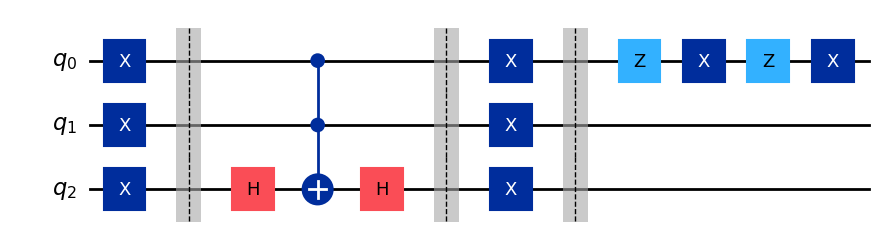

In [ ]:
qcUz = qc_Uz(3)
qcUz.draw('mpl')

In [ ]:
def qc_Uh(n): # 2|h><h| - I
    qc = QuantumCircuit(n, name = 'Uh')
    qc.h(list(range(n))) # transforma Uz em Uh
    qcUz = qc_Uz(n); qc.append(qcUz, list(range(n)))
    qc.h(list(range(n)))
    return qc

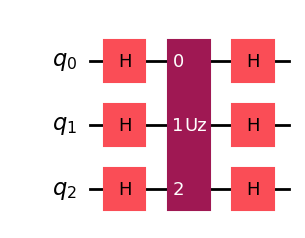

In [ ]:
qcUh = qc_Uh(3)
qcUh.draw('mpl')

In [ ]:
def qc_oracle(n):
    # Nielsen & Chuang, Box 6.1 (N=4)
    qc = QuantumCircuit(n+1, name = 'Oracle')
    qc.ccx(0,1,2) # para a solução sendo o estado |11>
    return qc

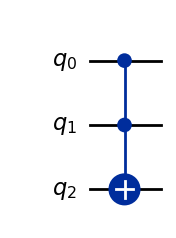

In [ ]:
qco = qc_oracle(2)
qco.draw('mpl')

In [ ]:
def qc_grover_iteration(n):
    qc = QuantumCircuit(n+1, name = 'G')
    qco = qc_oracle(n)
    qc.append(qco, list(range(n+1)))
    qcUh = qc_Uh(n); qc.append(qcUh, list(range(n)))
    return qc

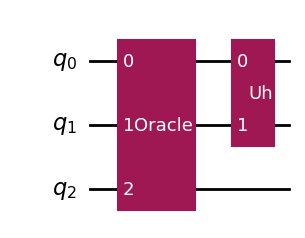

In [ ]:
qcgi = qc_grover_iteration(2)
qcgi.draw('mpl')

In [ ]:
def qc_hadamard_state(n): # aplica a Hadamard em n qubits
    qc = QuantumCircuit(n, name = 'H state') # começarei a não usar mais os qr[j]
    qc.h(list(range(n))) # aplica a hadamard em toda a lista de registros quânticos
    return qc

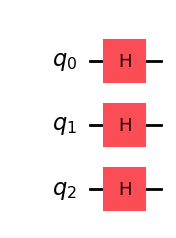

In [ ]:
qchs = qc_hadamard_state(3)
qchs.draw('mpl')

In [ ]:
def qc_grover_search(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n) # prepara o estado |-> no qubit auxiliar
    qchs = qc_hadamard_state(n+1) # estado de Hadamard
    qc.append(qchs, list(range(n+1)))
    ngs = int((math.pi*math.sqrt(2**n))/4 - 1/2) # número de iterações de Grover
    for j in range(0, ngs):
        qcgi = qc_grover_iteration(n)
        qc.append(qcgi, list(range(n+1)))
    qc.measure(list(range(n)), list(range(n)))
    return qc

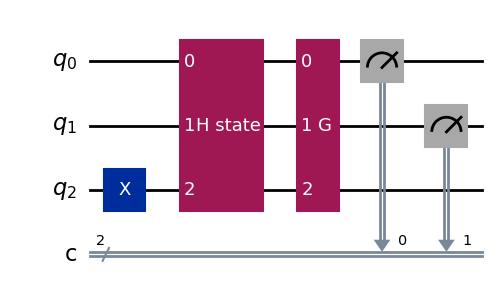

In [ ]:
qcgs = qc_grover_search(2)
qcgs.draw('mpl')

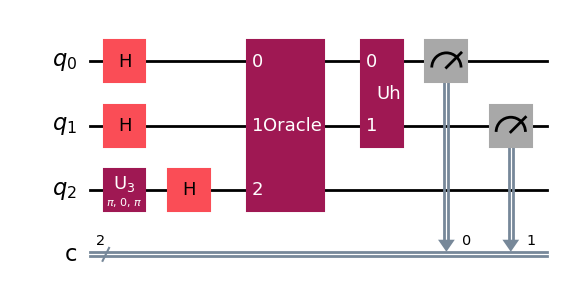

In [ ]:
qcgs.decompose().draw('mpl')

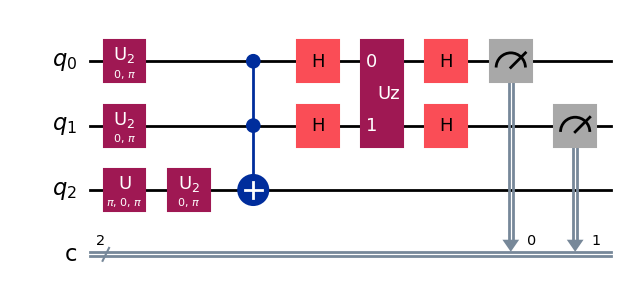

In [ ]:
qcgs.decompose().decompose().draw('mpl')

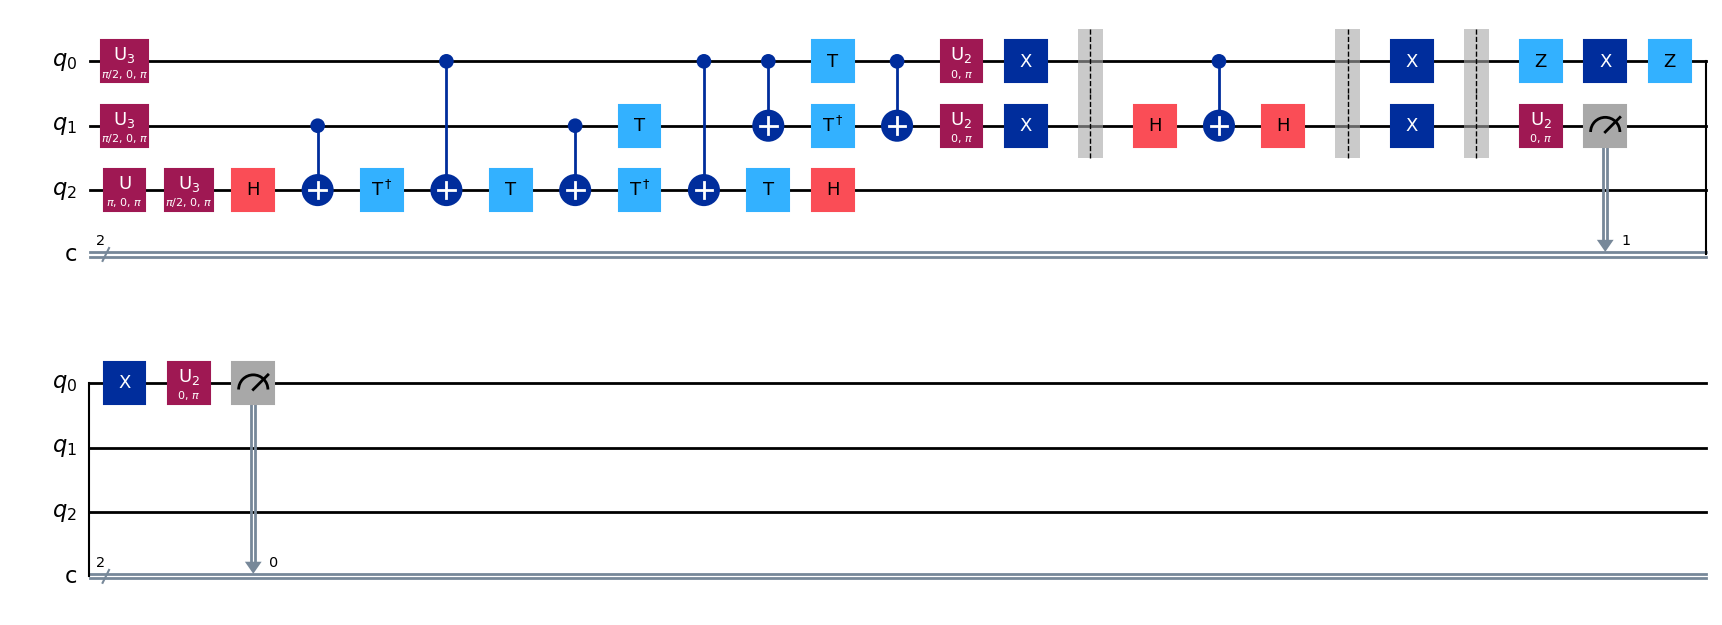

In [ ]:
qcgs.decompose().decompose().decompose().draw('mpl')

### Simulação

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)

In [ ]:
qc_list = []
qcgs = qc_grover_search(2)
qc_list.append(qcgs.decompose().decompose().decompose())

In [ ]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'11': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="5844f74b56a8215080cef13c6a328fe27fdd7b7ffa375f3221b4d14232ef6417c3024596294b0f8f85a520bb10fa1f186977af217064f39f1e7554067ef38e04")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

csh2thavnxy0008crv0g


In [ ]:
job_id = "csh2thavnxy0008crv0g"
job = service.job(job_id)

In [ ]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'11': 3715, '10': 132, '01': 182, '00': 67}


## Gráfico

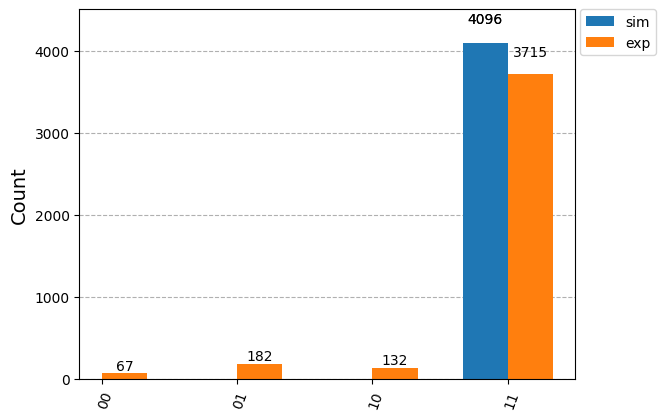

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

Novamente temos que usar algum critério para definir qual estado usaremos como solução. Novamente usamos o resultado mais provável, que neste caso é
$$|11\rangle.$$
Vemos que essa é a solução correta para o oráculo utilizado,
$$U_f = CC_X,$$
pois
\begin{align}
CC_X|00\rangle\otimes|-\rangle & = |00\rangle\otimes|-\rangle, \\
CC_X|01\rangle\otimes|-\rangle & = |01\rangle\otimes|-\rangle, \\
CC_X|10\rangle\otimes|-\rangle & = |10\rangle\otimes|-\rangle, \\
CC_X|11\rangle\otimes|-\rangle & = |11\rangle\otimes X|-\rangle \\
& = |11\rangle\otimes X(|0\rangle-|1\rangle)/\sqrt{2} \\
& = |11\rangle\otimes (|1\rangle-|0\rangle)/\sqrt{2} \\
& = -|11\rangle\otimes (|0\rangle-|1\rangle)/\sqrt{2} \\
& = -|11\rangle\otimes|-\rangle.
\end{align}

## Complexidade computacional

__Classicamente__ a complexidade computacional desse problema é
$$\mathcal{O}(N).$$
Podemos encontrar o item procurado na primeira consulta ao oráculo se seu índice for $0$. Mas também podemos encontrar esse item na $N$-ésima consulta, se seu índice for $N-1$. Se procurarmos de forma determinística ou aleatória, em média usaremos
$$N/2$$
consultas ao oráculo. Uma busca clássica está implementada no código abaixo.

Como vimos acima, o número de consultas ao oráculo no caso quântico é
$$\mathcal{O}\big(\sqrt{N}\big).$$
Temos portanto um ganho quadrático do algoritmo __quântico__ em relação ao algoritmo clássico.

In [ ]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [ ]:
def my_oracle(my_input):
    solution = 2
    if my_input == solution:
        response = True
    else:
        response = False
    return response

In [ ]:
my_input = 7
res = my_oracle(my_input)
print(res)

False


In [ ]:
for j in range(0,len(my_list)):
    if my_oracle(my_list[j]) == True:
        print('Solução encontrada no índice',j, ', após ', j+1, ' consultas ao oráculo.')

Solução encontrada no índice 3 , após  4  consultas ao oráculo.


## Referências

1. L. K. Grover, “A fast quantum mechanical algorithm for database search,” in Proceedings of the twenty-eighth annual ACM symposium on Theory of Computing, in STOC'96. New York, NY, USA: Association for Computing Machinery, Jul. 1996, pp. 212-219. doi: 10.1145/237814.237866.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.